In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [3]:
tf.version.VERSION

'2.1.0'

In [111]:
true_w = 5
true_b = 3
num_features = 100

X = np.arange(num_features)
noise = np.random.uniform(0,100,100)
y = true_w*X + true_b + noise


X = tf.cast(X, tf.float32)
y = tf.cast(y, tf.float32)

X = tf.reshape(X , shape=[num_features,1])
y = tf.reshape(y , shape=[num_features,1])


y.shape

TensorShape([100, 1])

In [170]:
tf.print(y)

[[45.4043808]
 [57.5989418]
 [95.1545181]
 ...
 [570.795288]
 [574.990662]
 [509.411804]]


In [0]:
X_norm = (X - np.mean(X))/np.std(X)
y_norm = (y - np.mean(y))/np.std(y)

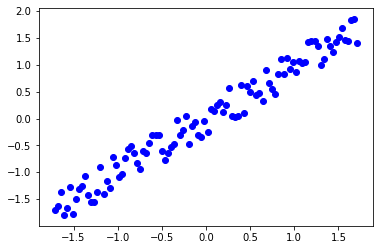

In [172]:
plt.scatter(X_norm,y_norm , c='b')
plt.show()

In [0]:
ds_train_Xy = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_norm, tf.float32),
     tf.cast(y_norm, tf.float32)))

In [0]:
for i , batch in enumerate(ds_train_Xy):
  tf.print(i,batch)

In [0]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(1.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w*x + self.b


model = MyModel()







In [143]:
model.build(input_shape=(None, 1))
model.summary()



Model: "my_model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [144]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


## testing the function:
yt = tf.convert_to_tensor([2.0])
yp = tf.convert_to_tensor([1.5])

tf.print(model(yt))
loss_val_test = loss_fn(model(yt), yp)
tf.print(loss_val_test)

[2]
0.25


In [0]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [0]:
Ws1, bs1 = [], []

for i, batch in enumerate(ds_train):
    if i >= 100:
      break
    tf.print(i,batch)
    Ws1.append(model.w.numpy())
    bs1.append(model.b.numpy())  

    

In [0]:
Ws1

In [0]:
tf.random.set_seed(1)

num_epochs = 20
log_steps = 100
learning_rate = 0.01
batch_size = 1
steps_per_epoch = int(np.ceil(num_features / batch_size))


ds_train = ds_train_Xy.shuffle(buffer_size=num_features)
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws, bs = [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
      break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps ==0:
      # print(i%log_steps)
      print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))
  


In [200]:
print('Final Normalized Parameters:', model.w.numpy(), model.b.numpy())

Final Normalized Parameters: 0.980261 0.0039078486


In [0]:
tf.random.set_seed(1)
model = MyModel()
model.build((None, 1))

model.compile(optimizer='sgd', 
              loss=loss_fn,
              metrics=['mae', 'mse'])

In [0]:
num_epochs = 50
batch_size = 1
model.fit(X_train_norm, y_norm, 
          epochs=num_epochs, batch_size=batch_size,
          verbose=1)

In [0]:
history = model.fit(X, y, 
          epochs=num_epochs, batch_size=batch_size,
          verbose=1)

In [211]:
score = model.evaluate(X_norm,y_norm)
score

100/100 [==============================] - 0s 94us/sample - loss: 0.0383 - mae: 0.1674 - mse: 0.0383


[0.038257691562175754, 0.16740976, 0.03825769]

0.990531 -0.009263319


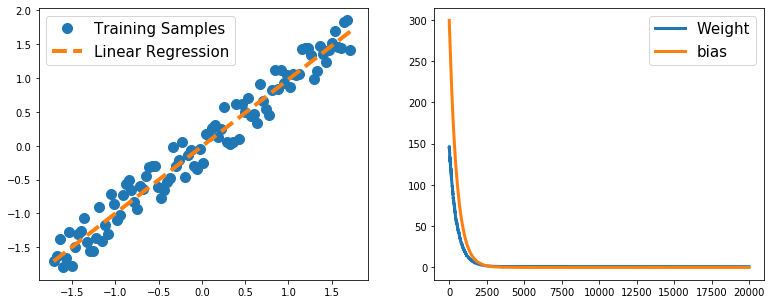

In [183]:
print(model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 100, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X)) / np.std(X)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_norm, y_norm, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=4)
plt.legend(['Training Samples', 'Linear Regression'], fontsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight', 'bias'], fontsize=15)
plt.show()

Introduce Batch Size into the Mix

In [0]:
W_pred= model.w.numpy()
b_pred = model.b.numpy()

In [0]:
predictions = W_pred * X_norm + b_pred

In [0]:
pred = predictions.numpy()

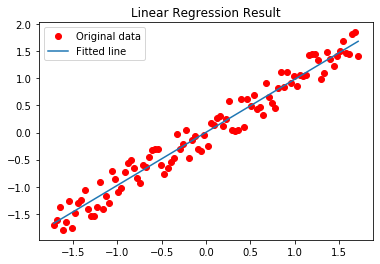

In [198]:
plt.plot(X_norm, y_norm, 'ro', label ='Original data') 
plt.plot(X_norm, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 